
# Modelos Estadísticos

## Diplomado en Técnicas Estadísticas y Minería de Datos

### Examen práctico 
### Grupo 38-2025

---



### Descripción del conjunto de datos
El conjunto de datos `penguins.csv` contiene información morfológica de diferentes especies de pingüinos en el archipiélago Palmer, Antártida.

| Variable             | Descripción                                      |
|----------------------|--------------------------------------------------|
| species              | Especie del pingüino (Adelie, Chinstrap, Gentoo) |
| island               | Isla donde fue observado                         |
| bill_length_mm       | Longitud del pico (mm)                           |
| bill_depth_mm        | Profundidad del pico (mm)                        |
| flipper_length_mm    | Longitud de la aleta (mm)                        |
| body_mass_g          | Masa corporal (g)                                |
| sex                  | Sexo del pingüino                                |

### Instrucciones 
Justifica tus respuestas con código, tablas y gráficos según sea necesario.

1. **[0.5 puntos]** Carga el conjunto de datos `penguins.csv`.
- ¿Cuántas observaciones y variables contiene el conjunto?
- ¿Existen valores faltantes?

In [2]:
import seaborn as sns

# Cargar conjunto de datos
df = sns.load_dataset('penguins')

# Vista parcial
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
196,Chinstrap,Dream,50.9,17.9,196.0,3675.0,Female
53,Adelie,Biscoe,42.0,19.5,200.0,4050.0,Male
172,Chinstrap,Dream,42.4,17.3,181.0,3600.0,Female
264,Gentoo,Biscoe,50.5,15.9,222.0,5550.0,Male
43,Adelie,Dream,44.1,19.7,196.0,4400.0,Male


In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
import pandas as pd

df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

- ¿Cuántas observaciones y variables contiene el conjunto?

Podemos observar que con `df.shape()` que es un conjunto de datos de 344 observaciones y 7 variables diferentes y con `df.info()` vemos 
el nombre de dichas variables y el tipo de variables que son.
    
- ¿Existen valores faltantes?

Con pandas podemos aplicar `df.isna().sum()` donde podemos observar que en total son 19 filas que no contienen datos.

2. **[0.5 puntos]** Clasifica las variables en cuantitativas y cualitativas

In [6]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Variable cuantitativa

- bill_length_mm
- bill_depth_mm
- flipper_length_mm
- body_mass_g
  
Variable cualitativa

- species
- island
- sex

3. **[1.5 puntos]** Elimina las observaciones con valores faltantes y calcula para cada especie:
- Rango, desviación estándar y coeficiente de variación (CV)
- Media y mediana
- Coeficiente de asimetría y curtosis
- Construye diagramas de caja y brazos para cada variable por especie e interpreta los resultados

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
df.shape

(333, 7)

In [10]:
print(" La especies de pinguinos que hay en esta base de datos son: ",df['species'].unique())

 La especies de pinguinos que hay en esta base de datos son:  ['Adelie' 'Chinstrap' 'Gentoo']


In [11]:
adelie_df = df[df['species'] == 'Adelie']
chinstrap_df = df[df['species'] == 'Chinstrap']
gentoo_df = df[df['species'] == 'Gentoo']


adelie_estadisticas = adelie_df.describe()
chinstrap_estadisticas = chinstrap_df.describe()
gentoo_estadisticas = gentoo_df.describe()

In [12]:
rango_adelie = adelie_estadisticas.loc['max'] - adelie_estadisticas.loc['min']
cv_adelie = (adelie_estadisticas.loc['std'] / adelie_estadisticas.loc['mean'] )* 100

rango_chinstrap = chinstrap_estadisticas.loc['max'] - chinstrap_estadisticas.loc['min']
cv_chinstrap = (chinstrap_estadisticas.loc['std'] / chinstrap_estadisticas.loc['mean'] )* 100

rango_gentoo = gentoo_estadisticas.loc['max'] - gentoo_estadisticas.loc['min']
cv_gentoo = (gentoo_estadisticas.loc['std'] / gentoo_estadisticas.loc['mean'] )* 100

In [13]:
from scipy.stats import skew, kurtosis

columnas_a_excluir = ['species', 'island', 'sex'] 

adelie_numerico_df = adelie_df.drop(columns=columnas_a_excluir, errors='ignore')
chinstrap_numerico_df = chinstrap_df.drop(columns=columnas_a_excluir, errors='ignore')
gentoo_numerico_df = gentoo_df.drop(columns=columnas_a_excluir, errors='ignore')


coeficiente_asimetria_adelie = adelie_numerico_df.apply(lambda x: skew(x.dropna(), bias=False))
coeficiente_kurtosis_adelie = adelie_numerico_df.apply(lambda x: kurtosis(x.dropna(), bias=False))


coeficiente_asimetria_chinstrap = chinstrap_numerico_df.apply(lambda x: skew(x.dropna(), bias=False))
coeficiente_kurtosis_chinstrap = chinstrap_numerico_df.apply(lambda x: kurtosis(x.dropna(), bias=False))

coeficiente_asimetria_gentoo = gentoo_numerico_df.apply(lambda x: skew(x.dropna(), bias=False))
coeficiente_kurtosis_gentoo = gentoo_numerico_df.apply(lambda x: kurtosis(x.dropna(), bias=False))

In [14]:
from statistics import median 
adelie_mediana = adelie_numerico_df.median()
chinstrap_mediana = chinstrap_numerico_df.median()
gentoo_mediana = gentoo_numerico_df.median()

In [15]:
# Imprimimos para los pinguinos de Adelie

print ( "\n El rango de los datos de los pinguinos Adelie es\n\n", rango_adelie)
print ( "\n La desviacion estandar de los datos de los pinguinos Adelie es\n\n", adelie_estadisticas.loc['std'])
print ( "\n El coeficiente de variacion de los datos de los pinguinos Adelie es\n\n", cv_adelie)
print ( "\n La media de los datos de los pinguinos Adelie es\n\n", adelie_estadisticas.loc['mean'])
print ( "\n La mediana de los datos de los pinguinos Adelie es\n\n", adelie_mediana)
print ( "\n El coeficiente de asimetria de los datos de los pinguinos Adelie es\n\n", coeficiente_asimetria_adelie)
print ( "\n El coeficiente de curtosis de los datos de los pinguinos Adelie es\n\n", coeficiente_kurtosis_adelie)

# Imprimimos para los pinguinos de Chinstrap

print ( "\n El rango de los datos de los pinguinos Chinstrap es\n\n", rango_chinstrap)
print ( "\n La desviacion estandar de los datos de los pinguinos Chinstrap es\n\n", chinstrap_estadisticas.loc['std'])
print ( "\n El coeficiente de variacion de los datos de los pinguinos Chinstrap es\n\n", cv_chinstrap)
print ( "\n La media de los datos de los pinguinos Chinstrap es\n\n", chinstrap_estadisticas.loc['mean'])
print ( "\n La mediana de los datos de los pinguinos Chinstrap es\n\n", chinstrap_mediana)
print ( "\n El coeficiente de asimetria de los datos de los pinguinos Chinstrap es\n\n", coeficiente_asimetria_chinstrap)
print ( "\n El coeficiente de curtosis de los datos de los pinguinos Chinstrap es\n\n", coeficiente_kurtosis_chinstrap)

# Imprimimos para los pinguinos de Gentoo

print ( "\n El rango de los datos de los pinguinos Gentoo es\n\n", rango_gentoo)
print ( "\n La desviacion estandar de los datos de los pinguinos Gentoo es\n\n", gentoo_estadisticas.loc['std'])
print ( "\n El coeficiente de variacion de los datos de los pinguinos Gentoo es\n\n", cv_gentoo)
print ( "\n La media de los datos de los pinguinos Gentoo es\n\n", gentoo_estadisticas.loc['mean'])
print ( "\n La mediana de los datos de los pinguinos Gentoo es\n\n", gentoo_mediana)
print ( "\n El coeficiente de asimetria de los datos de los pinguinos Gentoo es\n\n", coeficiente_asimetria_gentoo)
print ( "\n El coeficiente de curtosis de los datos de los pinguinos Gentoo es\n\n", coeficiente_kurtosis_gentoo)


 El rango de los datos de los pinguinos Adelie es

 bill_length_mm         13.9
bill_depth_mm           6.0
flipper_length_mm      38.0
body_mass_g          1925.0
dtype: float64

 La desviacion estandar de los datos de los pinguinos Adelie es

 bill_length_mm         2.662597
bill_depth_mm          1.219338
flipper_length_mm      6.521825
body_mass_g          458.620135
Name: std, dtype: float64

 El coeficiente de variacion de los datos de los pinguinos Adelie es

 bill_length_mm        6.858125
bill_depth_mm         6.645887
flipper_length_mm     3.430684
body_mass_g          12.374522
dtype: float64

 La media de los datos de los pinguinos Adelie es

 bill_length_mm         38.823973
bill_depth_mm          18.347260
flipper_length_mm     190.102740
body_mass_g          3706.164384
Name: mean, dtype: float64

 La mediana de los datos de los pinguinos Adelie es

 bill_length_mm         38.85
bill_depth_mm          18.40
flipper_length_mm     190.00
body_mass_g          3700.00
dtype

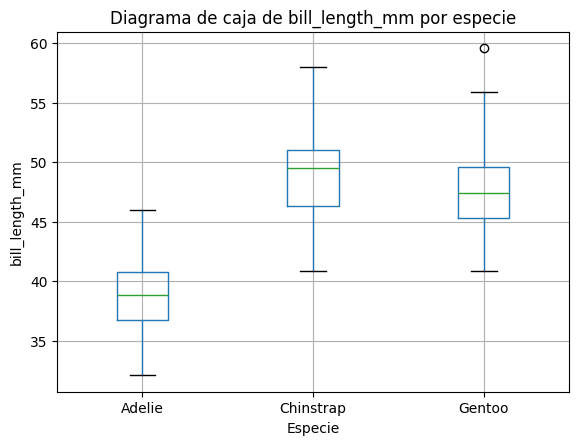

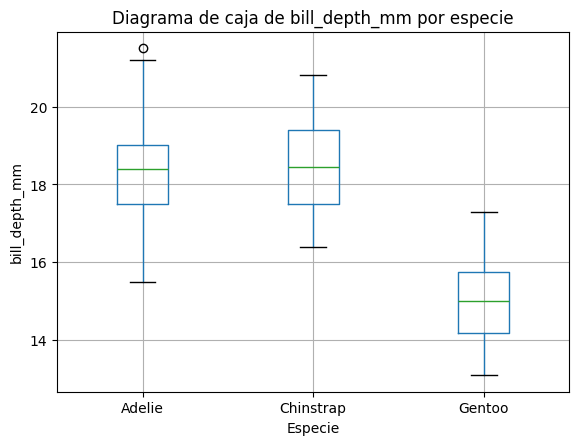

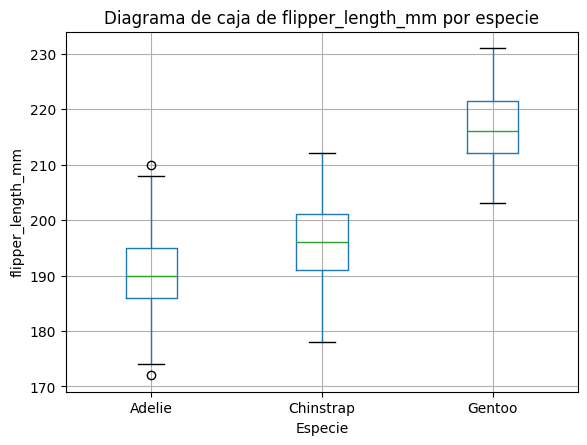

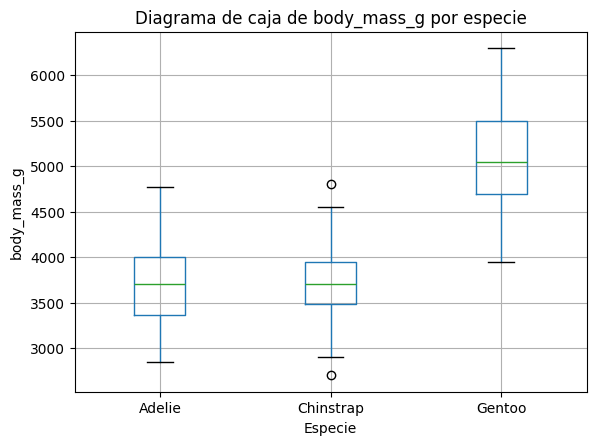

In [16]:
import matplotlib.pyplot as plt

variables = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g'
]

for var in variables:
    df.boxplot(column=var, by='species')
    plt.title(f'Diagrama de caja de {var} por especie')
    plt.suptitle('') 
    plt.xlabel('Especie')
    plt.ylabel(var)
    plt.show()


Podemos observar que la especie el pico mas corto es la especie de Adelie, la especie Chinstrap y gentoo son especies que tienen un rango muy similar, en cuanto al largo de la aleta y el peso, la especie gentoo esta por encima de las demas conuna mediana de al rededor de 5000 g de peso y 215 mm de largo de aleta podemos ver que la especie de adelie tiene mas valores atipicos, tambien podemos ver que la especie Adelie y chinstrap son especies que podrian tener la misma mediana de peso como de profundidad de pico, siendo aproximadamente un  eso de 3700g y 19 mm de profundidad de pico.

4. **[1.5 puntos]** Realiza una visualización de pares de variables numéricas (`pairplot`) coloreada por `species`.
- Describe patrones interesantes en las relaciones entre variables.

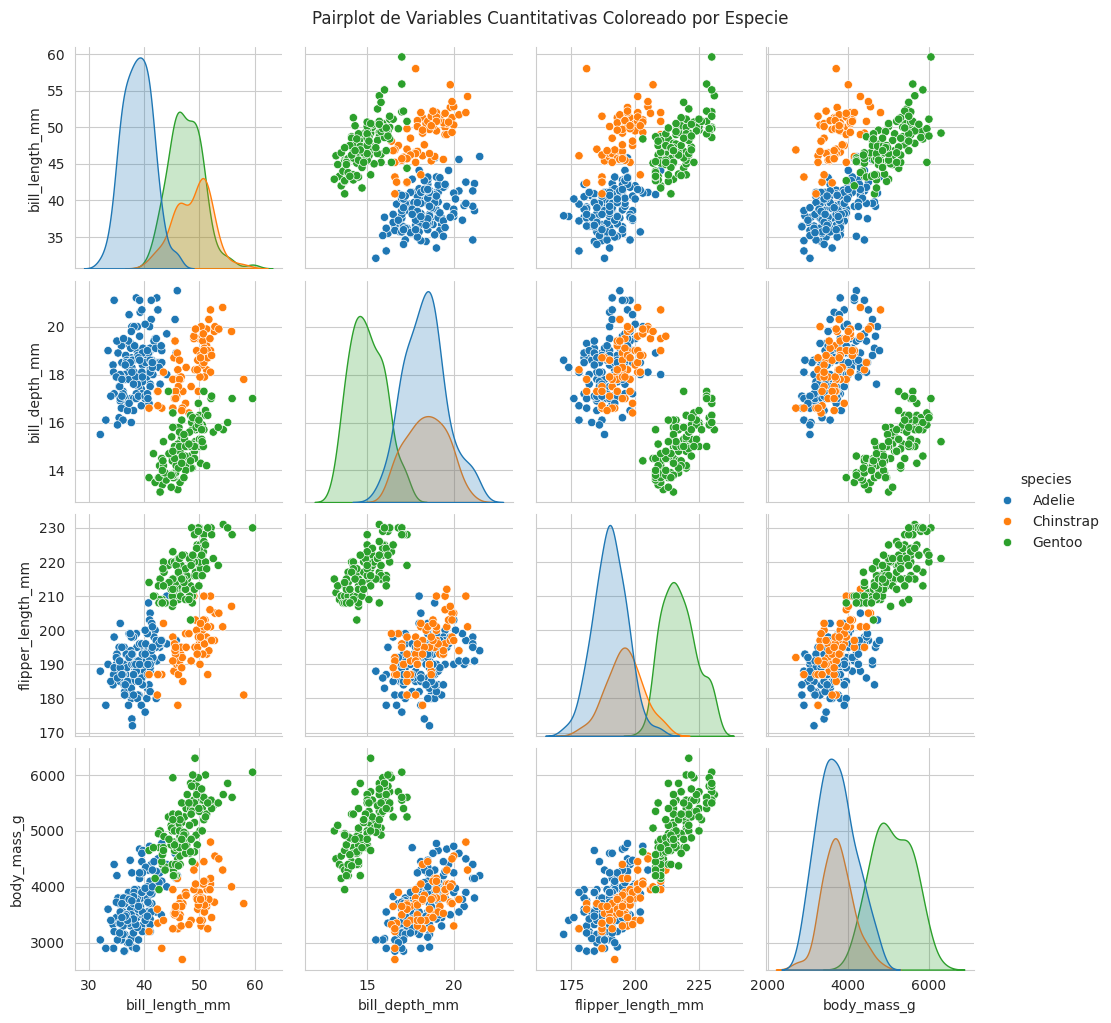

In [17]:
sns.set_style("whitegrid")

variables_cuantitativas = [ 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'] 

sns.pairplot(df,vars=variables_cuantitativas, hue='species', kind='scatter')

plt.suptitle("Pairplot de Variables Cuantitativas Coloreado por Especie", y=1.02)
plt.show()

En el grafico superior podemos ver que primero que los pinguinos Adelie cuentan con mas registros en la base de datos, los pinguinos Gentoo son los pinguinos mas pesados de los tres y tambien los que tienen la longuitud de aletas mas larga, sin embargo la profundidad del pico de estos es la menor de los tres, podemos observar que el rango de la longitud del pico del pinguino Adelie es similar al pinguino Gentoo,
tambien podemos observar que hay una relacion entre la longuitud de la aleta y el peso de las tres especies de pinguinos, tambien podemos observar que el pinguino Adelie es el pinguino que esta detras de la media de los otros pinguinos en todas la variables cuantitativas, exepto en la profundidad del pico. que es muy similar al pinguino Chinstrap, de este ultipo podemos decir que su media en todas la variables cuantitativas es similar al pinguino Adelie, exepto en la longuitud del pico.

5. **[1.5 puntos]** ¿Qué variables podrían ser útiles para predecir la masa corporal (`body_mass_g`)?
- Justifica tu respuesta con coeficientes de correlación.

In [18]:
columnas_a_excluir = ['species', 'island', 'sex'] 
df_numerico = df.drop(columns=columnas_a_excluir, errors='ignore')

matriz_correlacion = df_numerico.corr()

correlacion_masa_corporal = matriz_correlacion['body_mass_g'].sort_values(ascending=False)

print("Coeficientes de Correlación con Masa Corporal (body_mass_g)")
print(correlacion_masa_corporal)

Coeficientes de Correlación con Masa Corporal (body_mass_g)
body_mass_g          1.000000
flipper_length_mm    0.872979
bill_length_mm       0.589451
bill_depth_mm       -0.472016
Name: body_mass_g, dtype: float64


Podemos observar que el coeficiente de correlacion más util para predecir la masa corporal seria la longitud de la aleta (`flipper_length_mm`) ya que es el mas cercano a 1 lo que indica una muy fuerte correlacion postiva, en cuanto a `bill_length_mm` presenta uan debil corelacion positiva y `bill_depth_mm` presenta una debil corelacion negativa, no serian buenos para una prediccion.  

6. **[1.5 puntos]** Para las observaciones de la especie `Adelie` y del sexo masculino, verifica si la variable `flipper_length_mm` sigue una distribución normal.
- Aplica pruebas visuales
- Aplica pruebas estadísticas

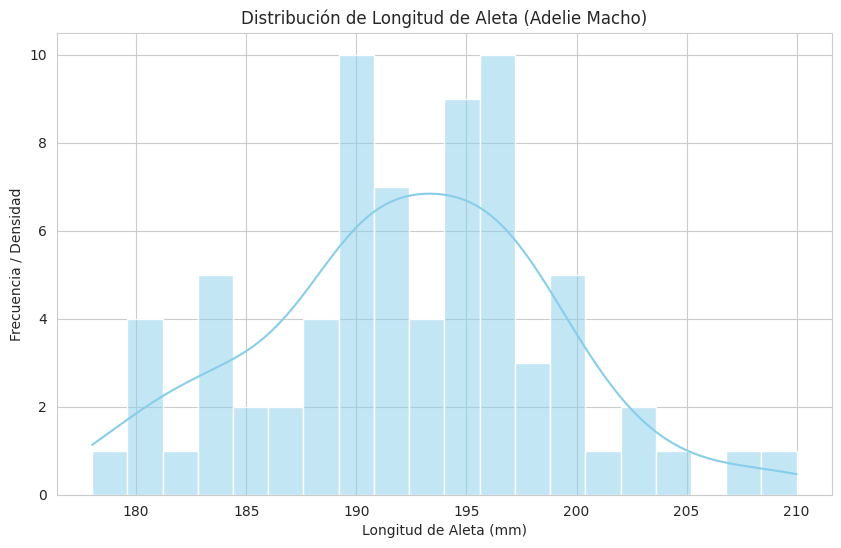

In [19]:
adelie_machos_df = adelie_df[adelie_df['sex'] == 'Male']
datos_flipper_adelie = adelie_machos_df['flipper_length_mm'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(datos_flipper_adelie, kde=True, bins=20, color='skyblue')

plt.title('Distribución de Longitud de Aleta (Adelie Macho)')
plt.xlabel('Longitud de Aleta (mm)')
plt.ylabel('Frecuencia / Densidad')
plt.show()

In [20]:
from scipy.stats import shapiro, probplot

shapiro_test = shapiro(datos_flipper_adelie)
print("Prueba de shapiro-wilk")
print(f"Estadístico W: {shapiro_test.statistic:.4f}")
print(f"Valor p: {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("Conclusión: El valor p > 0.05. No se rechaza la hipótesis nula. Los datos podrían ser normales.")
else:
    print("Conclusión: El valor p <= 0.05. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.")

Prueba de shapiro-wilk
Estadístico W: 0.9843
Valor p: 0.4984
Conclusión: El valor p > 0.05. No se rechaza la hipótesis nula. Los datos podrían ser normales.


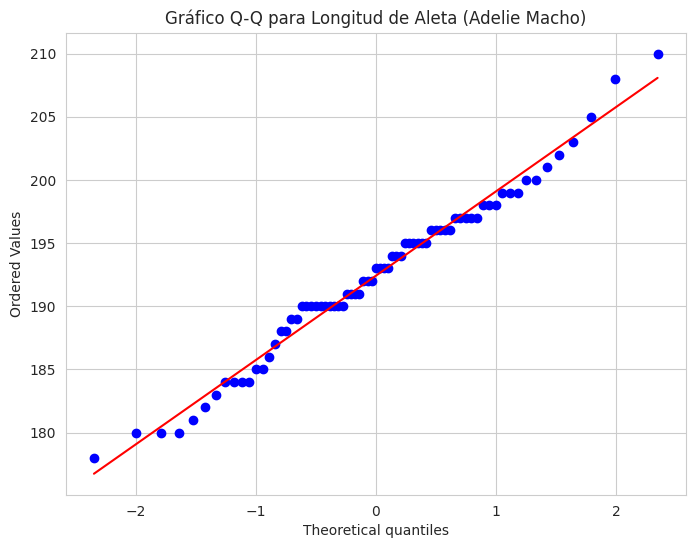

In [21]:
plt.figure(figsize=(8, 6))

probplot(datos_flipper_adelie, dist="norm", plot=plt)

plt.title('Gráfico Q-Q para Longitud de Aleta (Adelie Macho)')
plt.show()

In [22]:
from scipy.stats import jarque_bera

stat, p = jarque_bera(datos_flipper_adelie)

print("Prueba de Jarque–Bera")
print(f"Estadístico JB: {stat:.4f}")
print(f"Valor p: {p:.4f}")

if p > 0.05:
    print("Conclusión: El valor p > 0.05. No se rechaza la hipótesis nula. Los datos podrían ser normales.")
else:
    print("Conclusión: El valor p <= 0.05. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.")


Prueba de Jarque–Bera
Estadístico JB: 0.0199
Valor p: 0.9901
Conclusión: El valor p > 0.05. No se rechaza la hipótesis nula. Los datos podrían ser normales.


Con las dos graficas que hemos echo junto con las pruebas la prueba de Shapiro y la de Jarque podemos concluir que la variable `flipper_length_mm` sigue una distribución normal.

7. **[1.5 puntos]** Construye un intervalo de confianza del 95% para la media de `flipper_length_mm` para pingüinos `Adelie` machos.

In [23]:
from scipy import stats
import numpy as np

media_flipper_adeline_machos = datos_flipper_adelie.mean()
std_flipper_adeline_machos = datos_flipper_adelie.std(ddof=1)   
n = len(datos_flipper_adelie)

alpha = 0.05
t_critico = stats.t.ppf(1 - alpha/2, df=n-1)

margen_error = t_critico * (std_flipper_adeline_machos / np.sqrt(n))

limite_inferior = media_flipper_adeline_machos - margen_error
limite_superior = media_flipper_adeline_machos + margen_error

print("Intervalo de confianza del 95%:")
print(f"({limite_inferior:.2f}, {limite_superior:.2f})")
print(media_flipper_adeline_machos)

Intervalo de confianza del 95%:
(190.87, 193.95)
192.41095890410958


In [30]:
from scipy.stats import t

confianza = 0.95

n = len(datos_flipper_adelie)

t.interval(confidence=confianza, df=n-1, loc=np.mean(datos_flipper_adelie), scale=np.std(datos_flipper_adelie, ddof=1)/n**0.5)

(np.float64(190.8712242465664), np.float64(193.95069356165274))

8. **[1.5 puntos]** ¿Puedes afirmar que la longitud de aleta promedio de los pingüinos `Adelie` machos es distinta de la de las hembras?
- Aplica una prueba de hipótesis apropiada y concluye.

Hipótesis

Hipótesis nula (H0):

μmachos=μhembras

Hipótesis alternativa (H1):

μmachos != μhembras

In [37]:
from scipy.stats import ttest_ind


adelie_machos_df = adelie_df[adelie_df['sex'] == 'Male']

adelie_hembra_df = adelie_df[adelie_df['sex'] == 'Female']

datos_flipper_machos_adelie = adelie_machos_df['flipper_length_mm'].dropna()
datos_flipper_hembra_adelie = adelie_hembra_df['flipper_length_mm'].dropna()


t_stat, p_value = ttest_ind(datos_flipper_machos_adelie, datos_flipper_hembra_adelie, equal_var=False)

print("Prueba T")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")


Prueba T
Estadístico t: 4.5589
Valor p: 0.0000


Dado que el valor de p es menor a la significancia se puede afirmar que la longitud promedio de la aleta de los pingüinos Adelie machos es distinta de la de las hembras.